<a href="https://colab.research.google.com/github/maruwrks/Deep-Learning-Task/blob/main/01_DeepLearning_Task__Week_4_RNN%2CLSTM%2C_GRU_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow
#!pip install scikit-learn

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

##Tensorflow

###Data Preparation

In [ ]:
num_words = 50000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

###RNN

Pemodelan RNN

In [ ]:
def rnn_model(vocab_size, embed_size, hidden_size):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        SimpleRNN(hidden_size, dropout=0.5, return_sequences=False),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimzer

In [ ]:
RNN_optimizer = Adam(learning_rate=0.001)

Training data 😀😀😀

In [ ]:
def train_model_RNN(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128):
    optimizer = RNN_optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr]
    )

    return model, history
rnn_model = rnn_model(num_words, embed_size=128, hidden_size=256)
rnn_model, rnn_history = train_model_RNN(rnn_model, x_train, y_train, x_test, y_test)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 95ms/step - accuracy: 0.4921 - loss: 0.7600 - val_accuracy: 0.4962 - val_loss: 0.7204 - learning_rate: 0.0010
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.4968 - loss: 0.7086 - val_accuracy: 0.4992 - val_loss: 0.6932 - learning_rate: 0.0010
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.4989 - loss: 0.6945 - val_accuracy: 0.5104 - val_loss: 0.6933 - learning_rate: 0.0010
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.4981 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.5004 - loss: 0.6949 - val_accuracy: 0.5033 - val_loss: 0.6932 - learning_rate: 5.0000e-04


###LSTM

Modeling data LSTM

In [ ]:
def lstm_model(vocab_size, embed_size, hidden_size):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        LSTM(hidden_size, dropout=0.5, return_sequences=False),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [ ]:
LSTM_optimizer = Adam(learning_rate=0.001)

Training data 😀😀😀

In [ ]:
def train_model_LSTM(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128):
    optimizer = LSTM_optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr]
    )

    return model, history
lstm_model = lstm_model(num_words, embed_size=128, hidden_size=256)
lstm_model, lstm_history = train_model_LSTM(lstm_model, x_train, y_train, x_test, y_test)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.6374 - loss: 0.6216 - val_accuracy: 0.8516 - val_loss: 0.3487 - learning_rate: 0.0010
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.8802 - loss: 0.3064 - val_accuracy: 0.8652 - val_loss: 0.3241 - learning_rate: 0.0010
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.9346 - loss: 0.1771 - val_accuracy: 0.8549 - val_loss: 0.3622 - learning_rate: 0.0010
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.9576 - loss: 0.1192 - val_accuracy: 0.8589 - val_loss: 0.4303 - learning_rate: 0.0010
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.9796 - loss: 0.0639 - val_accuracy: 0.8634 - val_loss: 0.4788 - learning_rate: 5.0000e-04


###GRU

Modeling data GRU

In [ ]:
def gru_model(vocab_size, embed_size=128, hidden_size=128):
    model = Sequential([
        Embedding(vocab_size, embed_size, input_length=maxlen),
        Bidirectional(GRU(hidden_size, dropout=0.3, return_sequences=True)),
        Bidirectional(GRU(hidden_size//2, dropout=0., return_sequences=False)),
        Dense(64, kernel_regularizer='l2'),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

Optimizer

In [ ]:
GRU_optimizer = Adam(learning_rate=0.0001)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5),
    ModelCheckpoint('best_model.keras', save_best_only=True)
]

Training Data

In [ ]:
def train_model_GRU(model, x_train, y_train, x_val, y_val, epochs=10, batch_size=128):
    optimizer = GRU_optimizer
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)

    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=epochs,
        batch_size=64,
        callbacks=callbacks,
    )

    return model, history
gru_model = gru_model(num_words, embed_size=128, hidden_size=256)
gru_model, gru_history = train_model_GRU(gru_model, x_train, y_train, x_test, y_test)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 84s 201ms/step - accuracy: 0.5478 - loss: 1.5775 - val_accuracy: 0.5000 - val_loss: 2.8204 - learning_rate: 1.0000e-04
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 198ms/step - accuracy: 0.7948 - loss: 0.9633 - val_accuracy: 0.5027 - val_loss: 3.4363 - learning_rate: 1.0000e-04
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 199ms/step - accuracy: 0.8980 - loss: 0.5395 - val_accuracy: 0.5260 - val_loss: 2.7059 - learning_rate: 1.0000e-04
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 248ms/step - accuracy: 0.9350 - loss: 0.3230 - val_accuracy: 0.6678 - val_loss: 1.1435 - learning_rate: 1.0000e-04
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 199ms/step - accuracy: 0.9519 - loss: 0.2039 - val_accuracy: 0.7697 - val_loss: 0.8514 - learning_rate: 1.0000e-04
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 248ms/step - accuracy: 0.9676 - loss: 0.1256 - val_accuracy: 0.8148 - val_loss: 0.5476 - learning_rate: 1.0000e-04
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 

###Evaluasi dari RNN, LSTM, dan GRU

Modeling evaluasi untuk RNN, LSTM, dan GRU

In [ ]:
def evaluate_model(model, x_test, y_test, model_name):
    y_prob = model.predict(x_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"\n{model_name} Evaluation:")
    print("="*50)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.colorbar()
    plt.xticks([0,1], ['Negative', 'Positive'])
    plt.yticks([0,1], ['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    for i in range(2):
        for j in range(2):
            plt.text(j, i, str(cm[i][j]), ha='center', va='center', color='white' if cm[i,j] > cm.max()/2 else 'black')

    plt.show()

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

perbandingan antara RNN, LSTM, GRU

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step

RNN Evaluation:
Accuracy: 0.5033
Precision: 0.5317
Recall: 0.0558
F1 Score: 0.1009
ROC AUC: 0.5980

Classification Report:
              precision    recall  f1-score   support

    Negative       0.50      0.95      0.66     12500
    Positive       0.53      0.06      0.10     12500

    accuracy                           0.50     25000
   macro avg       0.52      0.50      0.38     25000
weighted avg       0.52      0.50      0.38     25000



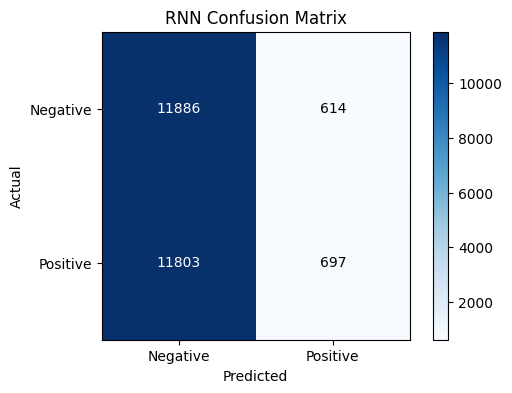

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step

LSTM Evaluation:
Accuracy: 0.8636
Precision: 0.8366
Recall: 0.9038
F1 Score: 0.8689
ROC AUC: 0.9378

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.82      0.86     12500
    Positive       0.84      0.90      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.87      0.86      0.86     25000
weighted avg       0.87      0.86      0.86     25000



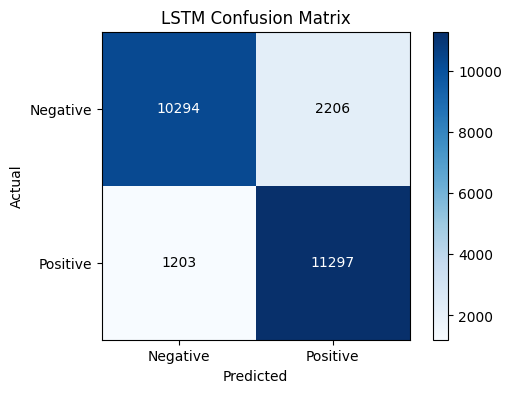

782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step

GRU Evaluation:
Accuracy: 0.8394
Precision: 0.8776
Recall: 0.7887
F1 Score: 0.8308
ROC AUC: 0.9242

Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.89      0.85     12500
    Positive       0.88      0.79      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



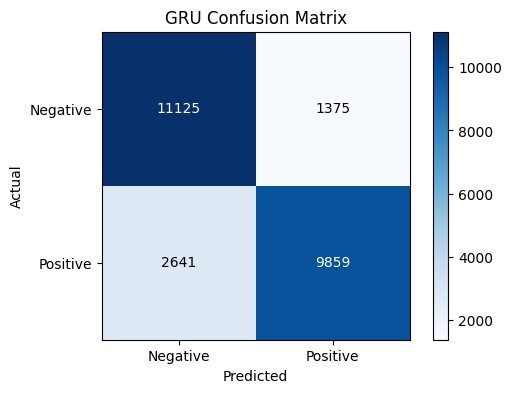

In [ ]:
rnn_results = evaluate_model(rnn_model, x_test, y_test, 'RNN')
lstm_results = evaluate_model(lstm_model, x_test, y_test, 'LSTM')
gru_results = evaluate_model(gru_model, x_test, y_test, 'GRU')

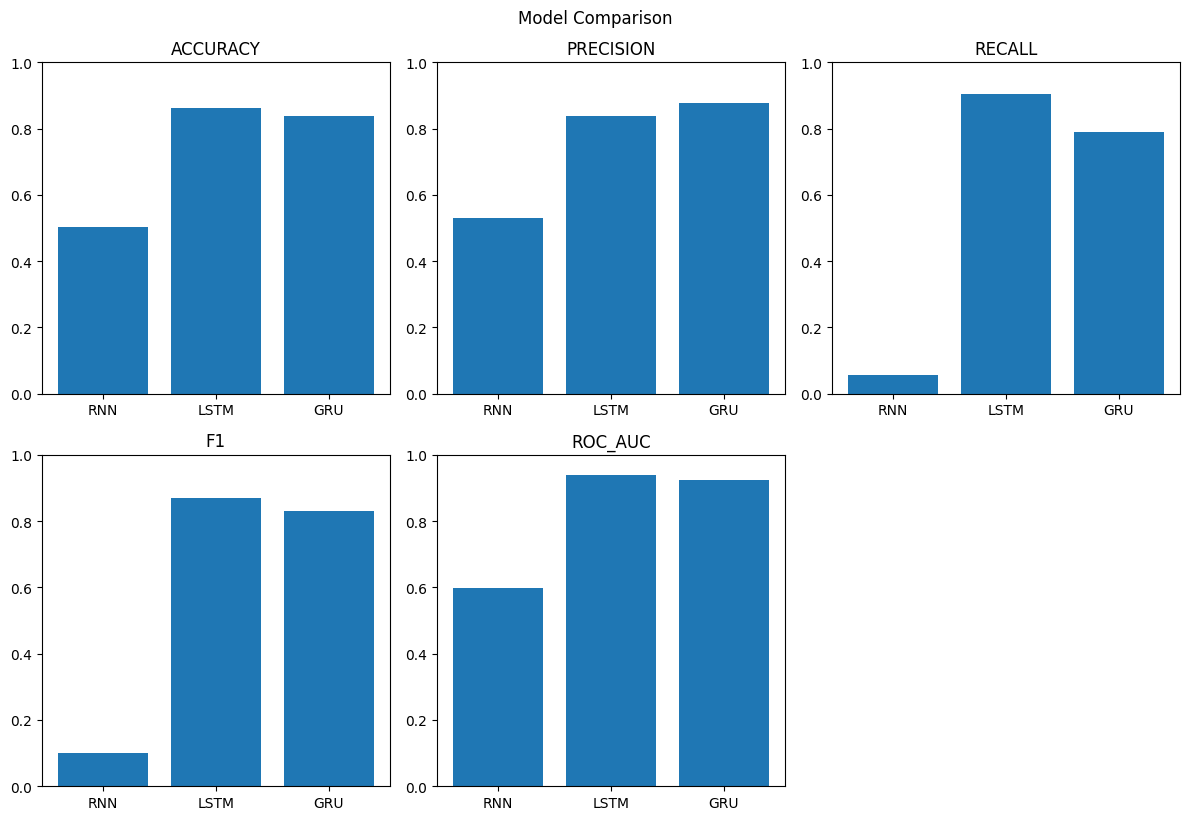

In [ ]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {'RNN': rnn_results, 'LSTM': lstm_results, 'GRU': gru_results}

plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    plt.bar(results.keys(), [results[model][metric] for model in results])
    plt.title(metric.upper())
    plt.ylim(0, 1)
plt.tight_layout()
plt.suptitle('Model Comparison', y=1.02)
plt.show()

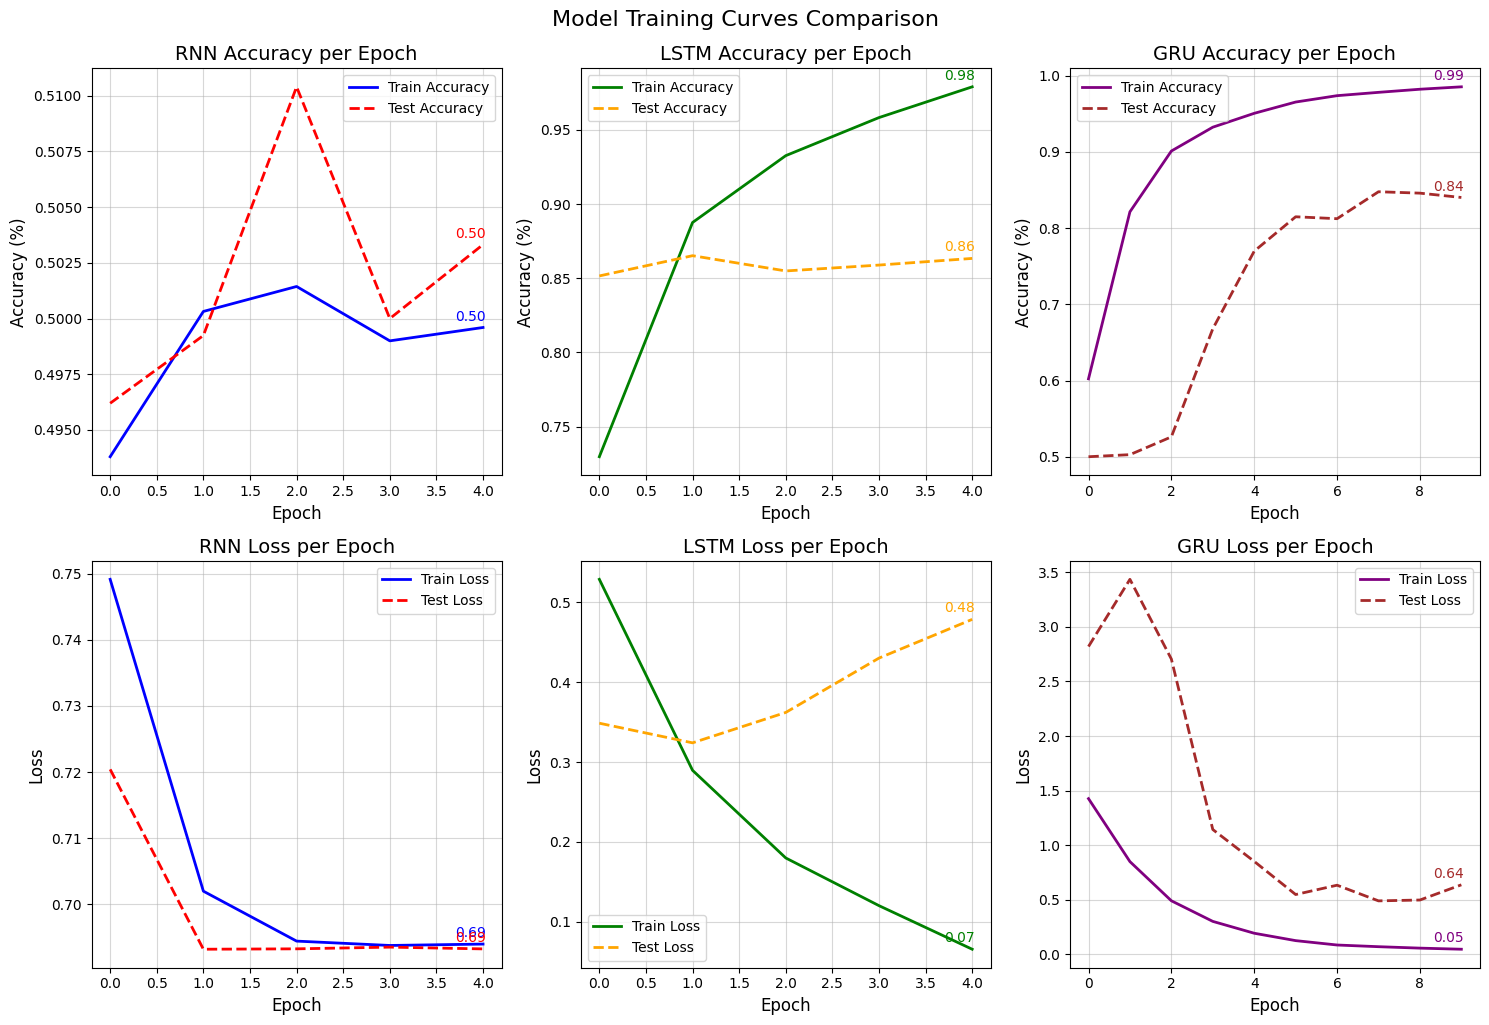

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# RNN Training Curves
plt.subplot(2, 3, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_accuracy'], '--', label='Test Accuracy', color='red', linewidth=2)
plt.title('RNN Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['accuracy']) - 1, rnn_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(rnn_history.history['val_accuracy']) - 1, rnn_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

plt.subplot(2, 3, 4)
plt.plot(rnn_history.history['loss'], label='Train Loss', color='blue', linewidth=2)
plt.plot(rnn_history.history['val_loss'], '--', label='Test Loss', color='red', linewidth=2)
plt.title('RNN Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{rnn_history.history['loss'][-1]:.2f}",
             xy=(len(rnn_history.history['loss']) - 1, rnn_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='blue')
plt.annotate(f"{rnn_history.history['val_loss'][-1]:.2f}",
             xy=(len(rnn_history.history['val_loss']) - 1, rnn_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='red')

# LSTM Training Curves
plt.subplot(2, 3, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy', color='green', linewidth=2)
plt.plot(lstm_history.history['val_accuracy'], '--', label='Test Accuracy', color='orange', linewidth=2)
plt.title('LSTM Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['accuracy']) - 1, lstm_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(lstm_history.history['val_accuracy']) - 1, lstm_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

plt.subplot(2, 3, 5)
plt.plot(lstm_history.history['loss'], label='Train Loss', color='green', linewidth=2)
plt.plot(lstm_history.history['val_loss'], '--', label='Test Loss', color='orange', linewidth=2)
plt.title('LSTM Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{lstm_history.history['loss'][-1]:.2f}",
             xy=(len(lstm_history.history['loss']) - 1, lstm_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='green')
plt.annotate(f"{lstm_history.history['val_loss'][-1]:.2f}",
             xy=(len(lstm_history.history['val_loss']) - 1, lstm_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='orange')

# GRU Training Curves
plt.subplot(2, 3, 3)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy', color='purple', linewidth=2)
plt.plot(gru_history.history['val_accuracy'], '--', label='Test Accuracy', color='brown', linewidth=2)
plt.title('GRU Accuracy per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['accuracy']) - 1, gru_history.history['accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_accuracy'][-1]:.2f}",
             xy=(len(gru_history.history['val_accuracy']) - 1, gru_history.history['val_accuracy'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.subplot(2, 3, 6)
plt.plot(gru_history.history['loss'], label='Train Loss', color='purple', linewidth=2)
plt.plot(gru_history.history['val_loss'], '--', label='Test Loss', color='brown', linewidth=2)
plt.title('GRU Loss per Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.annotate(f"{gru_history.history['loss'][-1]:.2f}",
             xy=(len(gru_history.history['loss']) - 1, gru_history.history['loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='purple')
plt.annotate(f"{gru_history.history['val_loss'][-1]:.2f}",
             xy=(len(gru_history.history['val_loss']) - 1, gru_history.history['val_loss'][-1]),
             xytext=(-20, 5), textcoords='offset points', fontsize=10, color='brown')

plt.tight_layout()
plt.suptitle('Model Training Curves Comparison', fontsize=16, y=1.02)
plt.show()